### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [1]:
import skimage as ski 
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
image = io.imread(r'C:\Users\Emeline_PRO\Documents\Modules\Module_ML\ML2_Classification et Clustering\ML2.3_clustering_intro\data\littleone-atelier-123.jpg')

In [3]:
image.shape

(3992, 6000, 3)

In [4]:
w, h, d = image.shape
image_array = np.reshape(image, (w * h, d)) # (pixels, couleurs)

In [5]:
image_array.shape

(23952000, 3)

In [6]:
n_colors = 16

from sklearn.cluster import KMeans

model = KMeans(n_clusters=n_colors, random_state=42)
model.fit(image_array)
labels_kmeans = model.predict(image_array)

In [7]:
centroids = model.cluster_centers_
centroids

array([[164.90495725, 143.77724995, 123.16549911],
       [102.32877678,  79.8801531 ,  50.34266227],
       [143.47481453, 115.60419764,  86.65079042],
       [189.71478358, 172.90246003, 159.3815224 ],
       [198.35532274, 143.19290564, 116.39193609],
       [186.72589563, 128.79352164,  97.44883221],
       [ 48.3384947 ,  26.07198434,   7.30784425],
       [181.41567486, 161.98394425, 144.65840688],
       [154.23189769, 131.07671937, 107.70228019],
       [ 79.54681174,  62.12017331,  37.33953661],
       [152.31267628, 101.78495072,  61.9921898 ],
       [129.1392189 ,  98.27065739,  64.05757832],
       [174.06092736, 153.44241625, 133.94973766],
       [104.84849719,  60.99918182,  20.09095907],
       [127.93180451,  83.29997939,  40.63596856],
       [171.71924551, 115.08460496,  80.08151656]])

In [8]:
image_kmeans_16_flat = centroids[labels_kmeans]
image_kmeans_16 = np.reshape(image_kmeans_16_flat, image.shape)

In [9]:
image_kmeans_16_uint8 = (image_kmeans_16 * 255).astype(np.uint8)
io.imsave('image_16_couleurs_KMeans.png', image_kmeans_16_uint8)

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [10]:
from sklearn.datasets import load_digits

digits = load_digits().data

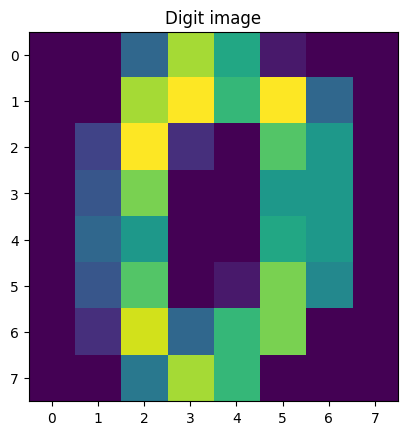

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
# an array of color values of pixels of its image
# first digit looks like 
sample_digit = digits[0].reshape(8, 8)
plt.imshow(sample_digit)
plt.title("Digit image")
plt.show()

digits[0]

In [12]:
def elbow_method(scale, df_norm): 


    ''' compute inertia for a given range of cluster 
    plot the curve 
    
    Args:
        range : of clusters 
        df_norm : data set scaled 
        '''
    
    inertia = []
    for n in scale:
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(df_norm)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(scale, inertia, marker='o')
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.xticks(scale)
    plt.grid(True)
    plt.show()

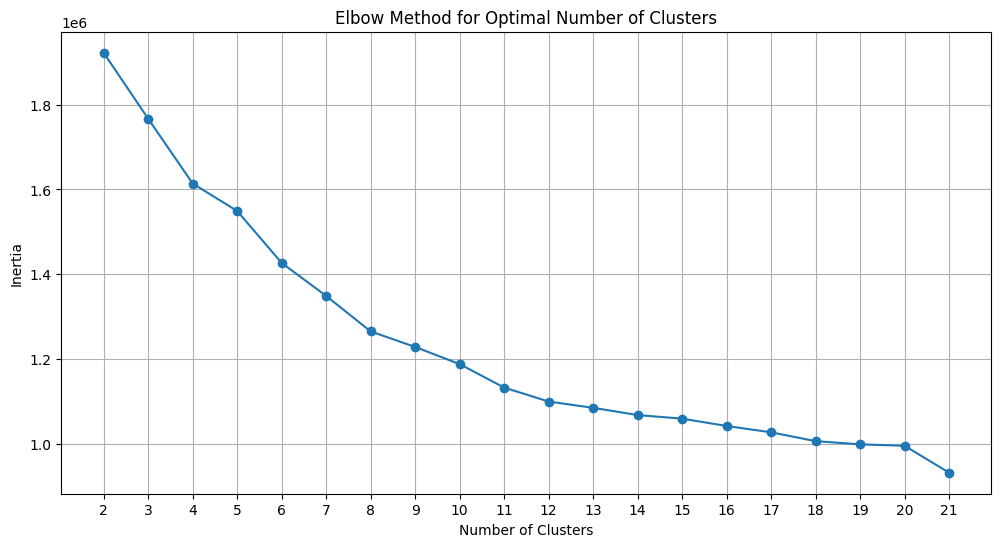

In [13]:
elbow_method(range(2,22), digits)

In [14]:
model_kmeans = KMeans(n_clusters=10, random_state=42)
model_kmeans.fit(digits)
labels = model_kmeans.predict(digits)
labels

array([5, 7, 7, ..., 8, 9, 8], shape=(1797,), dtype=int32)

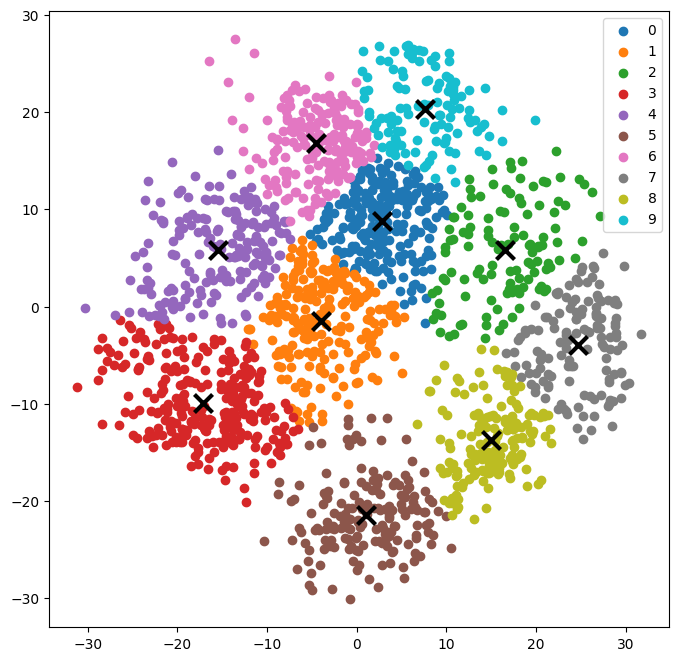

In [15]:
# Avec une PCA 

from sklearn.decomposition import PCA
pca = PCA(2)
reduced_data = pca.fit_transform(digits)
model_kmeans.fit(reduced_data)

# Calculating the centroids
centroids = model_kmeans.cluster_centers_
label = model_kmeans.fit_predict(reduced_data)
unique_labels = np.unique(label)

# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.legend()
plt.show()

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

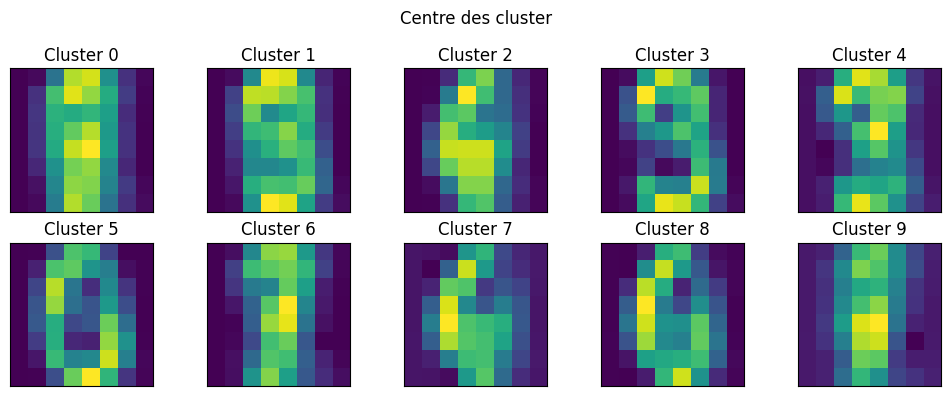

In [16]:
import matplotlib.pyplot as plt
import numpy as np

centroids_64d = pca.inverse_transform(model_kmeans.cluster_centers_)
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) 
axes = axes.flatten() 

for i, center in enumerate(centroids_64d ):
    center_image = center.reshape(8, 8)
    axes[i].imshow(center_image) 
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.suptitle("Centre des cluster")
plt.tight_layout()
plt.show()

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [17]:
model_kmeans = KMeans(n_clusters=10, random_state=42)
model_kmeans.fit(digits)
labels = model_kmeans.predict(digits)
labels

array([5, 7, 7, ..., 8, 9, 8], shape=(1797,), dtype=int32)

In [33]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

digits_data = load_digits()
X = digits_data.data
y_true = digits_data.target

model_kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
model_kmeans.fit(X)
clusters = model_kmeans.predict(X)

labels_corrected = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    most_common_label = mode(y_true[mask], keepdims=True)[0]
    labels_corrected[mask] = most_common_label

array([0, 8, 8, ..., 8, 9, 9], shape=(1797,), dtype=int32)

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [50]:
accuracy = accuracy_score(y_true, labels_corrected)
print(f"Accuracy Score : {accuracy:.4f}")

Accuracy Score : 0.9449


Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

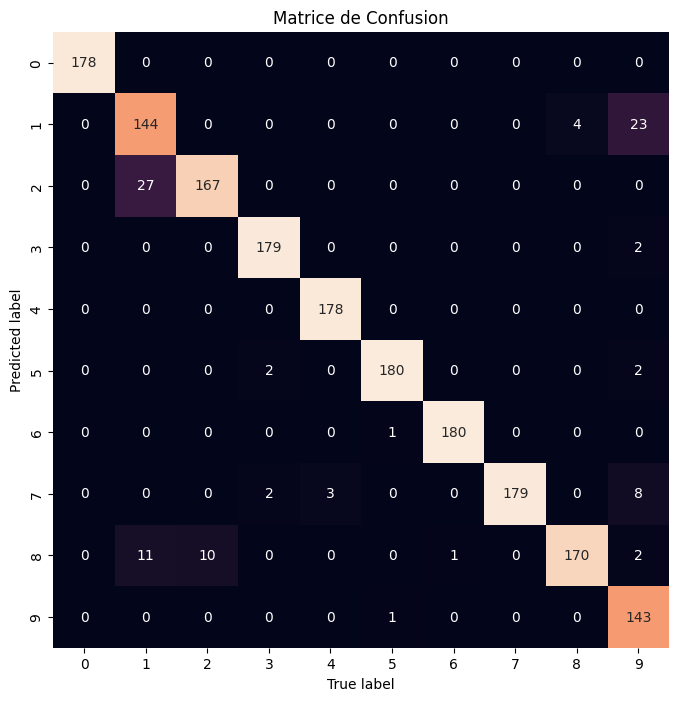

In [51]:
mat = confusion_matrix(y_true, labels_corrected)

plt.figure(figsize=(8, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits_data.target_names,
            yticklabels=digits_data.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Matrice de Confusion')
plt.show()

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


In [46]:
model_kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
model_kmeans.fit(X_tsne)
clusters = model_kmeans.predict(X_tsne)

labels_corrected = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    most_common_label = mode(y_true[mask], keepdims=True)[0]
    labels_corrected[mask] = most_common_label

In [48]:
accuracy = accuracy_score(y_true, labels_corrected)
print(f"\nScore de précision (Accuracy Score) : {accuracy:.4f}")


Score de précision (Accuracy Score) : 0.9449


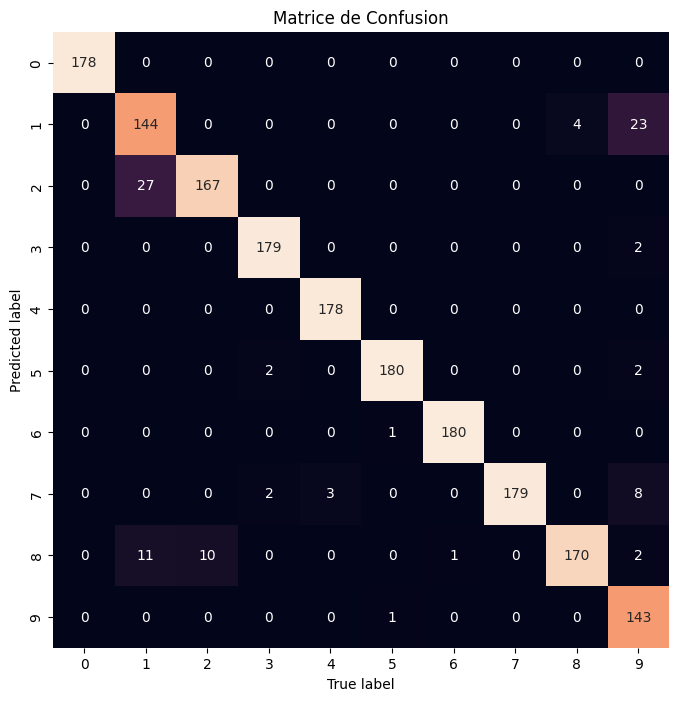

In [52]:
mat = confusion_matrix(y_true, labels_corrected)

plt.figure(figsize=(8, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits_data.target_names,
            yticklabels=digits_data.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Matrice de Confusion')
plt.show()